In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from classifier import *
torch.cuda.is_available(), torch.backends.cudnn.enabled

/home/sean/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(True, True)

In [3]:
PATH = Path('/home/sean/hpc-home/skin_cancer/')
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
test_csv = PATH / 'ISIC/test_isic17.csv'

test_mel_p = PATH / 'ISIC/test_mel_17.csv'
test_ker_p = PATH / 'ISIC/test_ker_17.csv'
test_all_p = PATH / 'ISIC/test_all_17.csv'
test_raw_p = PATH / 'ISIC/test_raw_17.csv'

train_skp = PATH / 'train_multi_sk.csv'
train_melp = PATH / 'train_multi_mel.csv'
train_all = PATH / 'train_multi.csv'
train_raw = PATH / 'train_multi_raw.csv'

%ls $PATH

dermofit/             ph2dataset/                      train_multi_mel.csv*
ISIC/                 test_isic17_dermofitLabels.csv*  train_multi_raw.csv*
isic18_p3_test_data*  tmp/                             train_multi_sk.csv*
isic_archive/         train_dermofit_isic17.csv*       val_isic17.csv*
models/               train_multi.csv*


## Setup Trainer

Dataset has: ['0', '1'] classes


 85%|████████▍ | 73/86 [00:15<00:02,  4.82it/s, loss=0.847]

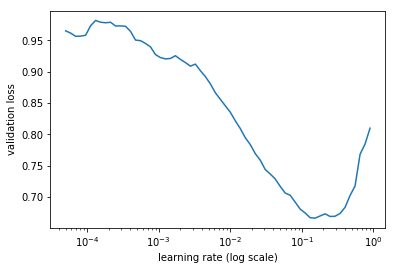

In [4]:
# The network architecture to use, resnet34 is a good start, will get better performance with resnext50 or inceptionv4
arch=resnet101
# image size
sz=224
bs=64
train_csv = train_melp
val_idx = list(range(5615 - 150, 5615))
# len(train_df) = 5615
test_csv = test_mel_p
w_name = 'resnet101_mel'

trainer = Trainer(PATH, arch, sz, bs, train_csv, test_folder=test_folder, val_idx=val_idx, sn=w_name)
trainer.lr_find()

In [5]:
trainer.set_lr(1e-2)
trainer.init_fit(w_name + '_1')

epoch      trn_loss   val_loss   accuracy                  
    0      0.364982   0.485532   0.773333  
    1      0.284573   0.448557   0.833333                  
    2      0.26959    0.495455   0.813333                  
    3      0.252039   0.482811   0.78                      


epoch      trn_loss   val_loss   accuracy                  
    0      0.215908   0.447426   0.806667  
    1      0.205861   0.438303   0.813333                  
    2      0.205544   0.453617   0.793333                  
Saved weights as "resnet101_mel_1"


In [6]:
trainer.inter_fit(w_name + '_2')

epoch      trn_loss   val_loss   accuracy                  
    0      0.249248   0.435      0.793333  
    1      0.255932   0.432077   0.806667                  
    2      0.244739   0.445826   0.806667                  
Saved weights as "resnet101_mel_2"


In [7]:
trainer.final_fit(w_name + '_3')
self.test_eval()

  0%|          | 0/86 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58